<b>ML1.2 Множественная линейная регрессия на чистых данных<br>
ПИ19-3 Деменчук Георгий</b>

1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

In [1]:
# Импорт всех либ
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

2. Загрузите датасет. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [2]:
# Читаем данные с .csv с помощью pandas
x_ = pd.read_csv('data/8_x.csv',names=['x1','x2','x3','x4','x5','x6','x7'])
y_ = pd.read_csv('data/8_y.csv', names = ['Y'])

Смотрим, что вообще у нас есть за данные

In [3]:
x_.head()

,x1,x2,x3,x4,x5,x6,x7
0,1.514584,-0.621563,-1.277379,-1.236340,0.449646,-0.713396,-0.008099
1,0.120996,0.969454,0.572916,-0.449216,-1.231906,-0.154540,-0.217604
2,0.091450,-1.781662,0.971287,-0.342499,0.358784,-0.474612,-0.629888
3,-1.128455,-1.036818,0.594698,-0.613796,2.937939,1.617190,0.236998
4,0.868826,-0.913182,0.366585,-0.254660,-0.185404,-0.863618,0.214062


In [4]:
y_.head()

,Y
0,-88.370484
1,-33.342405
2,-132.859442
3,156.519597
4,-71.378443


3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.




Смотрим на x

In [5]:
# точки данных x
x_.shape

(83, 7)

In [6]:
x_.describe()

,x1,x2,x3,x4,x5,x6,x7
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.083742,-0.038892,-0.077287,0.202356,0.111821,-0.106154,-0.044355
std,1.181994,0.941986,0.891228,1.226907,1.019480,1.007005,0.929658
min,-3.545896,-1.889278,-2.538651,-2.502444,-2.621536,-2.452811,-2.007143
25%,-0.589996,-0.687546,-0.486259,-0.611158,-0.590063,-0.760261,-0.748415
50%,0.120996,-0.099994,0.020013,0.133044,0.150418,-0.154540,-0.009249
75%,0.831314,0.692257,0.559829,1.199444,0.715865,0.658789,0.680093
max,2.470810,2.157520,1.884430,2.594291,2.937939,1.626076,1.909412


Смотрим на y

In [7]:
y_.shape

(83, 1)

In [8]:
y_.describe()

,Y
count,83.000000
mean,-9.601932
std,120.800458
min,-336.124426
25%,-87.287939
50%,-2.394386
75%,67.341250
max,221.017606


4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=0)

5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [10]:
from sklearn.linear_model import LinearRegression

Т.к. у нас 7 факторов, то чтб код не повторялся, пишем универсальный метод

In [11]:
def r_2_score(column_name : str) -> None:
    
    #Модель линейной регрессии
    y = LinearRegression().fit(x_train[[column_name]].values, y_train.values)
    #Прогнозируем значения
    y_res = y.predict(x_test[[column_name]].values)
    
    #Строим точки значений на графике 
    plt.scatter(x_test[[column_name]].values, y_test.values, color='b')
    #Строим линию регрессии
    plt.plot(x_test[[column_name]].values, y_res, color='r', linewidth=2)
    #Высчитываем показатель R2
    r_2 = y.score(x_test[[column_name]].values,  y_test.values)
    
    ##!! Чем ближе R^2 к 1, тем сильнее связь и модель адекватнее
    print(f"R^2 score: {r_2}")

Фактор <b>x1</b>

R^2 score: -0.05325883090743888


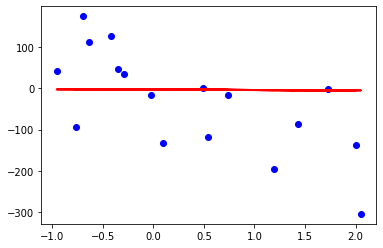

In [12]:
r_2_score("x1")

Связи практически нет

Фактор <b>x2</b>

R^2 score: -0.08944785310024339


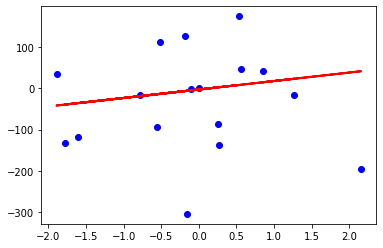

In [13]:
r_2_score("x2")

Связи практически нет

Фактор <b>x3</b>

R^2 score: -0.026921283778556626


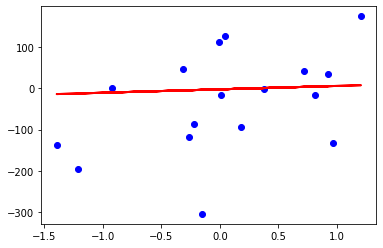

In [14]:
r_2_score("x3")

Связи практически нет

Фактор <b>x4</b>

R^2 score: -0.01226925013326241


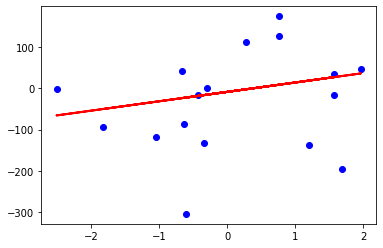

In [15]:
r_2_score("x4")

Связи практически нет

Фактор <b>x5</b>

R^2 score: -0.08354874212613783


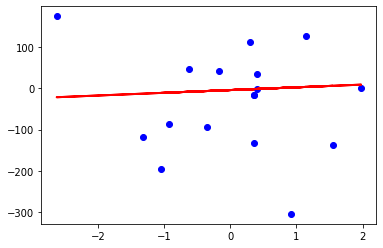

In [16]:
r_2_score("x5")

Связи практически нет

Фактор <b>x6</b>

R^2 score: 0.5650997651075196


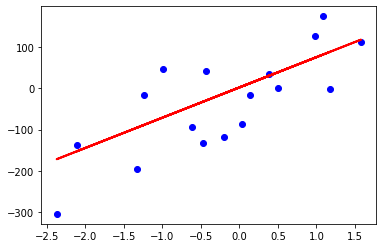

In [17]:
r_2_score("x6")

Связь есть! Средняя, R = 0.5

Фактор <b>x7</b>

R^2 score: 0.3805420226084154


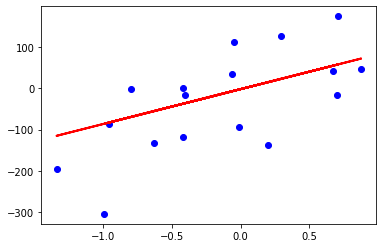

In [18]:
r_2_score("x7")

Связь есть, ниже средней

<b>Вывод: </b> хоть немного существунная связь есть по факторам x6 (R^2 = 0.56) и x7 (R^2 = 0.38)

6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [19]:
import statsmodels.formula.api as sm

data = pd.DataFrame(np.array(x_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]), 
                            columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
data['y'] = np.array(y_train)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

# Используем МНК - метод наименьших квадратов
model = sm.ols(formula='y~x1+x2+x3+x4+x5+x6+x7', data=data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1322.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.69e-61
Time:                        19:34:05   Log-Likelihood:                -241.71
No. Observations:                  66   AIC:                             499.4
Df Residuals:                      58   BIC:                             516.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4024      1.288      0.312      0.756      -2.177       2.981
x1            -1.7153      1.029     -1.666      0.101      -3.776       0.345
x2            15.8909      1.373     11.575      0.000      13.143      18.639
x3             0.9495      1.378      0.689      0.494      -1.809       3.708
x4            14.4585      1.053     13.733      0.000      12.351      16.566
x5             7.1799      1.277      5.623      0.000       4.624       9.736
x6            81.9551      1.309     62.611      0.000      79.335      84.575
x7            94.6981      1.279     74.021      0.000      92.137      97.259
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.333
Skew:                           0.115   Prob(JB):                        0.846
Kurtosis:                       2.738   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Выводы:</b>

Если учитывать все факторы, то общий показатель модели по R^2 = 0.993, что является очень хорошей связью и тем, что модель жизнеспособна<br>
<br>
Наиболее влияющие факторы - это x7 и x6 с коэффами 94.6981 и 81.9551 соответственно. Также в пользу этого можно рассмотреть R^2 моделей, полученных только с учетом этих факторов (0.5650997651075196 для x6 и 0.3805420226084154 для x7

По DW мы можем видеть:<br>Автокорреляция отсутствует т.к. (1.5 < DW = 2.131 < 2.5)<br>Гомоскедастичность присутствует (1 < DW=2.131 < 2)

По Prob (F-statistic) = 1.69e-61 = 0 видим, что регрессия значима

Делая общий вывод, можем сказать, что полученная обобщенная модель по всем факторам имеет право на жизнь и с ней можно работать